# Предобработка данных

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Missing data (отсутствующие данные)

In [72]:
df_avito = pd.read_csv('avito.csv')

In [73]:
df_avito.tail()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
995,401d5fa8e55d,b5fe6a389cc4,Ярославская область,Ярославль,Хобби и отдых,Спорт и отдых,Игры с мячом,NaN,NaN,Продам бутсы Adidas,продам бутсы в отличном состоянии.отыграл 3 тр...,NaN,27,2017-03-27,Private,7c640fb4b6b4066c54e082193b66bedaedfee5e4d12975...,640.0,0.00000
996,4b136de2c16a,f57df929a284,Воронежская область,Воронеж,Бытовая электроника,"Игры, приставки и программы",Игры для приставок,NaN,NaN,Продам диск lara croft на psp,NaN,350.0,142,2017-03-27,Company,0a7686a2e05ca2dc0470e550f1f03b1eddee7919d363ca...,2888.0,0.00000
997,a65090f39f50,8673d0037023,Свердловская область,Монетный,Недвижимость,"Дома, дачи, коттеджи",Продам,Коттедж,NaN,Коттедж 150 м² на участке 12 сот.,Продается чудесный коттедж в экологически чист...,5900000.0,5830,2017-03-18,Shop,9061df217dd8f2b338e2645d52b09af6143677d011002a...,1376.0,0.07725
998,53e0aa75cecd,fbfe3f73586d,Башкортостан,Ишимбай,Транспорт,Автомобили,С пробегом,Hyundai,i30,"Hyundai i30, 2012",Продается автомобиль Hyundai i30. Был куплен ...,550000.0,1,2017-03-20,Private,c7fe551884576cb8b1bb9bbfe216b3e0b437d6b2208deb...,1118.0,0.10521
999,211a7d242f97,b3e017bd61eb,Самарская область,Самара,Для дома и дачи,Ремонт и строительство,Окна и балконы,NaN,NaN,Породам окно,"Глухое 1кам32 с.пакет, ш650в1440. Новое не под...",2000.0,32,2017-03-24,Private,a68483a58dfbf3b7abf95dfe623651aa45dc211dbb2992...,1405.0,0.00000


In [4]:
df_avito.iloc[995]

item_id                                                      401d5fa8e55d
user_id                                                      b5fe6a389cc4
region                                                Ярославская область
city                                                            Ярославль
parent_category_name                                        Хобби и отдых
category_name                                               Спорт и отдых
param_1                                                      Игры с мячом
param_2                                                               NaN
param_3                                                               NaN
title                                                 Продам бутсы Adidas
description             продам бутсы в отличном состоянии.отыграл 3 тр...
price                                                                 NaN
item_seq_number                                                        27
activation_date                       

In [6]:
df_avito.iloc[995]['price']

nan

In [7]:
expensive_items = df_avito[df_avito['price'] > 1000]
expensive_items

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,В хорошем состоянии,1300.0,9,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,0.80323
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,Электро водонагреватель накопительный на 100 л...,11000.0,125,2017-03-23,Private,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,0.00000
10,d5480bb4a6e4,d46200940f37,Ханты-Мансийский АО,Ханты-Мансийск,Недвижимость,Квартиры,Сдам,На длительный срок,1,"1-к квартира, 25 м², 2/2 эт.",Сдается однокомнатная мебелированная квартира ...,18000.0,6,2017-03-25,Private,645d3fb949cb116a00c596ca1e168d8c5ddd21cdeacc5a...,1396.0,0.58853
13,df2116f34563,3ce3c2318b16,Ростовская область,Ростов-на-Дону,Бытовая электроника,Товары для компьютера,Мониторы,NaN,NaN,Монитор acer 18.5,Продам манитор 18.5 v193HQV. В хорошем состоянии,2500.0,47,2017-03-22,Private,0c84cef077d10e5bb37af78049fb0a593c9f1c7f37f458...,2849.0,0.00000
14,a97943ae8158,f643d87dd23c,Башкортостан,Туймазы,Животные,Собаки,Немецкая овчарка,NaN,NaN,Продаются щенки немецкой овчарки,"родились 1 февраля,три кобеля и сучка.",5000.0,6,2017-03-23,Private,09ebf4b30bad5857a1f26cd18d907c1e888bbe718bb13d...,2133.0,0.00000
16,7896ef8fe482,007c6bd858cb,Краснодарский край,Краснодар,Транспорт,Автомобили,С пробегом,Chevrolet,Lanos,"Chevrolet Lanos, 2008","Кондиционер, гидроусилитель руля, электрически...",140000.0,201,2017-03-18,Company,5244375e00cb2baefa50f4b01156cc492f8733b93c6cba...,1118.0,0.32100


In [9]:
print("df_avito.shape: {}".format(df_avito.shape))
print("expensive_items.shape: {}".format(expensive_items.shape))

df_avito.shape: (1000, 18)
expensive_items.shape: (480, 18)


In [10]:
items_with_price = df_avito[df_avito['price'] != np.nan]
items_with_price

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,В хорошем состоянии,1300.0,9,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,0.80323
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,Электро водонагреватель накопительный на 100 л...,11000.0,125,2017-03-23,Private,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,0.00000
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,Бойфренды в хорошем состоянии.,500.0,61,2017-03-25,Private,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.0,0.80323
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,54 раз мер очень удобное,500.0,85,2017-03-17,Private,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.0,0.00000
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,По стельке 15.5см мерить приокский район. Цвет...,400.0,136,2017-03-22,Company,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.0,0.00000


In [11]:
print("df.shape: {}".format(df_avito.shape))
print("items_with_price.shape: {}".format(items_with_price.shape))

df.shape: (1000, 18)
items_with_price.shape: (1000, 18)


In [12]:
(np.nan == np.nan) / 1

False

In [13]:
np.nan != np.nan

True

In [14]:
df_avito['price'].isna()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979     True
980    False
981    False
982    False
983    False
984    False
985     True
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994     True
995     True
996    False
997    False
998    False
999    False
Name: price, Length: 1000, dtype: bool

In [15]:
np.sum(df_avito['price'].isna())

65

In [16]:
df_avito['price'].notna()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24     False
25      True
26      True
27      True
28      True
29      True
       ...  
970     True
971     True
972     True
973     True
974     True
975     True
976     True
977     True
978     True
979    False
980     True
981     True
982     True
983     True
984     True
985    False
986     True
987     True
988     True
989     True
990     True
991     True
992     True
993     True
994    False
995    False
996     True
997     True
998     True
999     True
Name: price, Length: 1000, dtype: bool

In [17]:
df_without_nan = df_avito.loc[df_avito['price'].notna()]

In [19]:
print("np.nan + 1 = {}".format(np.nan + 1))
print("np.nan - 1 = {}".format(np.nan - 1))
print("np.nan * 1 = {}".format(np.nan * 1))
print("np.nan / 1 = {}".format(np.nan / 1))
print("np.sum([np.nan, 1]) = {}".format(np.sum([np.nan, 1])))
arr = np.array([np.nan, 1, 2, 3, np.nan])
print("arr.sum() = {}".format(arr.sum()))

np.nan + 1 = nan
np.nan - 1 = nan
np.nan * 1 = nan
np.nan / 1 = nan
np.sum([np.nan, 1]) = nan
arr.sum() = nan


In [20]:
df_avito['price'].sum()

269889239.0

In [21]:
df_avito['price'].sum(skipna=False)

nan

In [22]:
df_avito['price'].sum() / df_avito.shape[0]

269889.239

In [23]:
df_avito['price'].mean()

288651.592513369

In [24]:
df_avito['price'].mean(skipna=False)

nan

In [25]:
df_dropna = df_avito.dropna(axis=0)
df_dropna.shape

(356, 18)

In [26]:
df_avito['price'].fillna(0)

0          400.0
1         3000.0
2         4000.0
3         2200.0
4        40000.0
5         1300.0
6        11000.0
7          500.0
8          500.0
9          400.0
10       18000.0
11           1.0
12          70.0
13        2500.0
14        5000.0
15         800.0
16      140000.0
17         500.0
18        1000.0
19      100000.0
20     1748000.0
21        2600.0
22      249000.0
23        1300.0
24           0.0
25        1500.0
26        1000.0
27        1500.0
28        1000.0
29         200.0
         ...    
970        500.0
971       1580.0
972       3000.0
973        400.0
974      11500.0
975        500.0
976    1600000.0
977    1650000.0
978     560000.0
979          0.0
980        250.0
981      10000.0
982        250.0
983       1000.0
984        300.0
985          0.0
986       4200.0
987        200.0
988        700.0
989        150.0
990      12000.0
991          1.0
992       2300.0
993        650.0
994          0.0
995          0.0
996        350.0
997    5900000

In [27]:
df_avito['price'].fillna(df_avito['price'].mean())

0      4.000000e+02
1      3.000000e+03
2      4.000000e+03
3      2.200000e+03
4      4.000000e+04
5      1.300000e+03
6      1.100000e+04
7      5.000000e+02
8      5.000000e+02
9      4.000000e+02
10     1.800000e+04
11     1.000000e+00
12     7.000000e+01
13     2.500000e+03
14     5.000000e+03
15     8.000000e+02
16     1.400000e+05
17     5.000000e+02
18     1.000000e+03
19     1.000000e+05
20     1.748000e+06
21     2.600000e+03
22     2.490000e+05
23     1.300000e+03
24     2.886516e+05
25     1.500000e+03
26     1.000000e+03
27     1.500000e+03
28     1.000000e+03
29     2.000000e+02
           ...     
970    5.000000e+02
971    1.580000e+03
972    3.000000e+03
973    4.000000e+02
974    1.150000e+04
975    5.000000e+02
976    1.600000e+06
977    1.650000e+06
978    5.600000e+05
979    2.886516e+05
980    2.500000e+02
981    1.000000e+04
982    2.500000e+02
983    1.000000e+03
984    3.000000e+02
985    2.886516e+05
986    4.200000e+03
987    2.000000e+02
988    7.000000e+02


In [28]:
arr_ts = [
    0.469112,
    np.nan,
    -5.689738,
    np.nan,
    -8.916232
]
dates = [
    pd.Timestamp('2000-01-31'),
    pd.Timestamp('2000-02-29'),
    pd.Timestamp('2002-07-31'),
    pd.Timestamp('2005-01-31'),
    pd.Timestamp('2008-04-30')
]

ts = pd.Series(arr_ts, index=dates)
ts

2000-01-31    0.469112
2000-02-29         NaN
2002-07-31   -5.689738
2005-01-31         NaN
2008-04-30   -8.916232
dtype: float64

In [29]:
ts.interpolate()

2000-01-31    0.469112
2000-02-29   -2.610313
2002-07-31   -5.689738
2005-01-31   -7.302985
2008-04-30   -8.916232
dtype: float64

In [30]:
ts.interpolate(method='time')

2000-01-31    0.469112
2000-02-29    0.273271
2002-07-31   -5.689738
2005-01-31   -7.095568
2008-04-30   -8.916232
dtype: float64

## Standardization (стандартизация)

In [31]:
df_apts = pd.read_csv('apt_prices.csv')
df_apts.head()

,X1,X2
0,57.565811,4.458676e+06
1,38.980196,1.996861e+06
2,47.248367,3.803824e+06
3,50.910823,3.435008e+06
4,67.741659,4.431305e+06


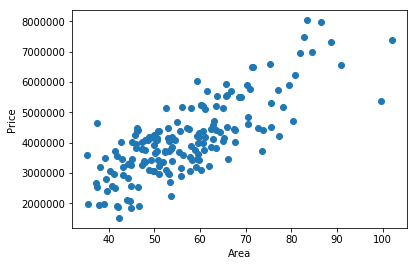

In [32]:
plt.plot(df_apts['X1'], df_apts['X2'], 'o')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

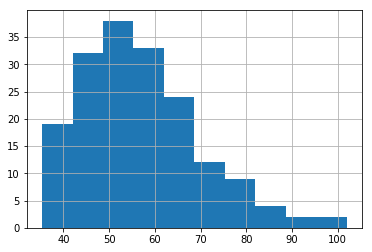

In [33]:
df_apts['X1'].hist()

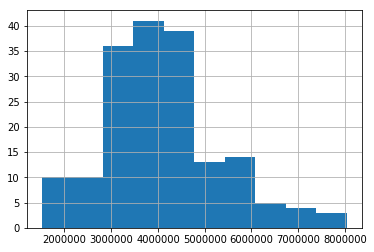

In [34]:
df_apts['X2'].hist()

$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

(array([10., 10., 36., 41., 39., 13., 14.,  5.,  4.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

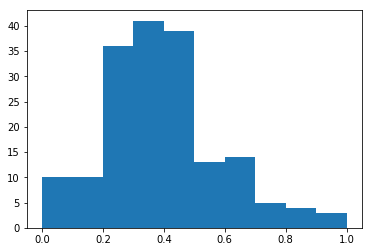

In [35]:
plt.hist((df_apts['X2'] - df_apts['X2'].min()) / (df_apts['X2'].max() - df_apts['X2'].min()))

$$X_{changed} = \frac{X - \mu}{\sigma}$$

(array([10., 10., 36., 41., 39., 13., 14.,  5.,  4.,  3.]),
 array([-2.08749818, -1.56400688, -1.04051558, -0.51702428,  0.00646701,
         0.52995831,  1.05344961,  1.57694091,  2.10043221,  2.62392351,
         3.14741481]),
 <a list of 10 Patch objects>)

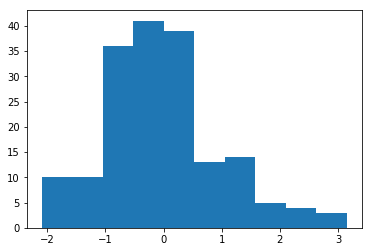

In [36]:
plt.hist((df_apts['X2'] - df_apts['X2'].mean()) / df_apts['X2'].std())

## One-hot encoding (one-hot кодирование)

In [38]:
df_avito.tail()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
995,401d5fa8e55d,b5fe6a389cc4,Ярославская область,Ярославль,Хобби и отдых,Спорт и отдых,Игры с мячом,NaN,NaN,Продам бутсы Adidas,продам бутсы в отличном состоянии.отыграл 3 тр...,NaN,27,2017-03-27,Private,7c640fb4b6b4066c54e082193b66bedaedfee5e4d12975...,640.0,0.00000
996,4b136de2c16a,f57df929a284,Воронежская область,Воронеж,Бытовая электроника,"Игры, приставки и программы",Игры для приставок,NaN,NaN,Продам диск lara croft на psp,NaN,350.0,142,2017-03-27,Company,0a7686a2e05ca2dc0470e550f1f03b1eddee7919d363ca...,2888.0,0.00000
997,a65090f39f50,8673d0037023,Свердловская область,Монетный,Недвижимость,"Дома, дачи, коттеджи",Продам,Коттедж,NaN,Коттедж 150 м² на участке 12 сот.,Продается чудесный коттедж в экологически чист...,5900000.0,5830,2017-03-18,Shop,9061df217dd8f2b338e2645d52b09af6143677d011002a...,1376.0,0.07725
998,53e0aa75cecd,fbfe3f73586d,Башкортостан,Ишимбай,Транспорт,Автомобили,С пробегом,Hyundai,i30,"Hyundai i30, 2012",Продается автомобиль Hyundai i30. Был куплен ...,550000.0,1,2017-03-20,Private,c7fe551884576cb8b1bb9bbfe216b3e0b437d6b2208deb...,1118.0,0.10521
999,211a7d242f97,b3e017bd61eb,Самарская область,Самара,Для дома и дачи,Ремонт и строительство,Окна и балконы,NaN,NaN,Породам окно,"Глухое 1кам32 с.пакет, ш650в1440. Новое не под...",2000.0,32,2017-03-24,Private,a68483a58dfbf3b7abf95dfe623651aa45dc211dbb2992...,1405.0,0.00000


In [39]:
df_avito.nunique()

item_id                 1000
user_id                  997
region                    28
city                     190
parent_category_name       9
category_name             46
param_1                  146
param_2                   94
param_3                   90
title                    944
description              929
price                    248
item_seq_number          287
activation_date           14
user_type                  3
image                    921
image_top_1              567
deal_probability         229
dtype: int64

In [41]:
one_hot_category = pd.get_dummies(df_avito['category_name'])
one_hot_category.head()

,Автомобили,Аквариум,Аудио и видео,Билеты и путешествия,Бытовая техника,Велосипеды,Водный транспорт,Гаражи и машиноместа,Готовый бизнес,Грузовики и спецтехника,...,Растения,Ремонт и строительство,Собаки,Спорт и отдых,Телефоны,Товары для детей и игрушки,Товары для животных,Товары для компьютера,Фототехника,Часы и украшения
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Decomposition (декомпозиция)

In [43]:
df_avito.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [44]:
from datetime import datetime

In [45]:
weekdays = []
for x in df_avito['activation_date']:
    weekdays.append(datetime.strptime(x, "%Y-%m-%d").weekday())
weekdays = np.array(weekdays)
is_weekend = (weekdays >= 5).astype(int)

In [46]:
is_weekend

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

## Aggregation (агрегация)

In [47]:
df_apts_new = df_apts.drop('X1', axis=1)
df_apts_new.shape

(175, 1)

In [48]:
# df_apts['X2'].shape
length_width = np.random.randint(low=3, high=20, size=(175, 2))
length_width.shape
df_apts_new = pd.DataFrame(length_width, columns=['length', 'width'])
df_apts_new = pd.concat([df_apts_new, df_apts['X2']], axis=1)
df_apts_new

,length,width,X2
0,12,8,4.458676e+06
1,9,7,1.996861e+06
2,18,17,3.803824e+06
3,17,11,3.435008e+06
4,18,8,4.431305e+06
5,4,18,4.033624e+06
6,5,6,5.185875e+06
7,18,6,3.455775e+06
8,16,8,4.394154e+06
9,7,3,3.775538e+06


In [49]:
df_apts_new['area'] = df_apts_new['length'] * df_apts_new['width']
df_apts_new = df_apts_new.drop(['length', 'width'], axis=1)

In [50]:
df_apts_new.head()

,X2,area
0,4.458676e+06,96
1,1.996861e+06,63
2,3.803824e+06,306
3,3.435008e+06,187
4,4.431305e+06,144


## Test set

In [63]:
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [64]:
df.shape

(333, 15)

In [65]:
X_train = df.drop('medv', axis=1).values[:300]
Y_train = df['medv'].values[:300]

X_test = df.drop('medv', axis=1).values[300:]
Y_test = df['medv'].values[300:]
Y_test.shape

(33,)

In [67]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()

mdl.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
Y_pred = mdl.predict(X_test)
Y_pred

array([21.50511621, 21.40071033, 24.36931194, 21.96241362, 18.87947429,
       13.50095406, 16.8125074 , 18.15517555, 20.16013165, 23.84285972,
       23.3654083 , 16.89373152, 21.12332111, 11.82648436, 20.11624344,
       23.66575423, 24.74064544, 28.6626799 , 22.18904478, 20.29716423,
       20.47858775, 22.60826181,  8.65101737, -1.23954537, 10.50498694,
       13.27907139, 19.2650183 , 17.38255762, 16.61825231, 22.30744484,
       21.19488228, 26.81361898, 21.24138415])

In [69]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_pred, Y_test)

0.5589413820153353

In [70]:
Y_pred_test = mdl.predict(X_train)
explained_variance_score(Y_pred_test, Y_train)

0.6486076040161952